### Домашнее задание №8 по курсу "Машинное обучение"
Новик Никита

Для разделения **spambase.data.shuffled** в заданном соотношении был использован скрипт *data_to_svm_labeled.py*. Этот скрипт также перегоняет исходные данные в формат, пригодный для использования с *svm-scale, svm-train, svm-predict*.

### Задание 3

Затем над полученными файлами было произведено масштабирование на интервал [-1, 1]. 

___svm-scale -l -1 -u 1 -s train.range train > train.scale___

___svm-scale -r train.range test > test.scale___

### Задание 4

После этого был применен скрипт *run_svm_validation.py* для получения результатов кросс-валидации при степенях полинома d = 1, 2, 3, 4 и при C = $2^{-10} ... 2^{10}$. Для этого была запущена следующая команда:

***python2 run_svm_validation.py train.scale 10***

Результаты выполнения представлены ниже.

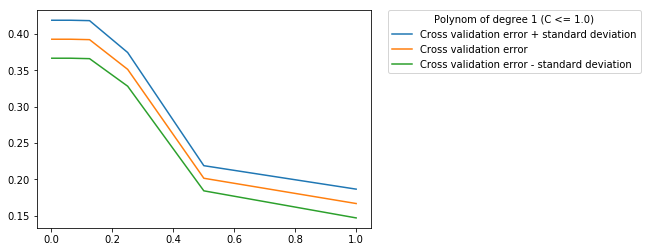

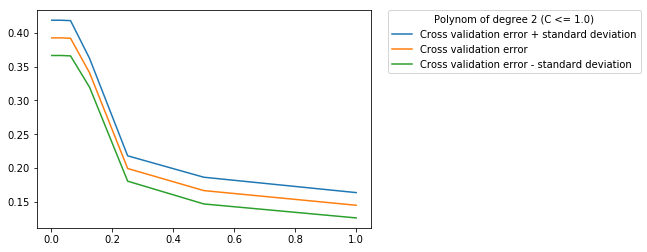

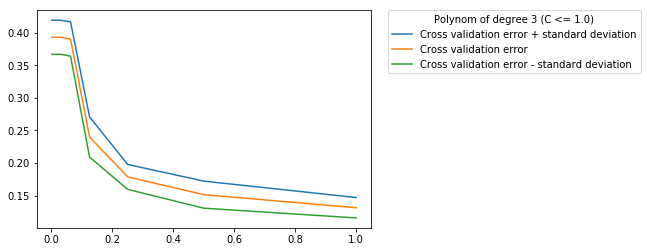

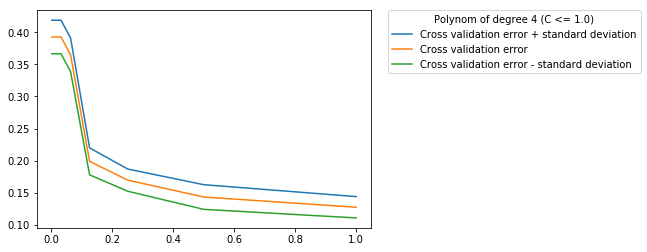

In [53]:
import os
import re
from itertools import groupby
from matplotlib import pyplot as plt

def group_in_blocks(lines, block_size):
    return [lines[i:i+block_size] for i in range(0, len(lines), block_size)]

def extract_knowledge_from_block(block):
    params = re.findall(r'(?<=\().*?(?=\))', block[-1])[0]
    params = params.split(", ")
    d, C = [p.split("=")[1] for p in params]
    d = int(d)
    C = float(C)
    cv_error = 1.0 - float(block[-1].split(": ")[1])
    fold_errors = [1.0 - float(line.split(": ")[1]) / 100 for line in block[:-1]]
    standard_deviation = sum((cv_error - err) ** 2 for err in fold_errors) / len(fold_errors)
    standard_deviation = standard_deviation ** 0.5
    return (d, C, cv_error, standard_deviation)

with open("report_train") as k_fold_result:
    validation_results = k_fold_result.readlines()
    blocks = group_in_blocks(validation_results, 11)
    validation_results = [extract_knowledge_from_block(block) for block in blocks]

validation_results = groupby(validation_results, key=lambda x: x[0])
validation_results = {k:list(v) for k, v in validation_results}

for d, info in validation_results.items():
    x = []
    cv_plus = []
    cv = []
    cv_minus = []
    for sample in info:
        C, cv_err, standard_dev = sample[1:]
        if (C > 1.0):
            break
        x.append(C)
        cv_plus.append(cv_err + standard_dev)
        cv.append(cv_err)
        cv_minus.append(cv_err - standard_dev)
    plt.plot(x, cv_plus, label="Cross validation error + standard deviation")
    plt.plot(x, cv, label="Cross validation error")
    plt.plot(x, cv_minus, label="Cross validation error - standard deviation")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Polynom of degree " + str(d) + " (C <= 1.0)")
    plt.show()

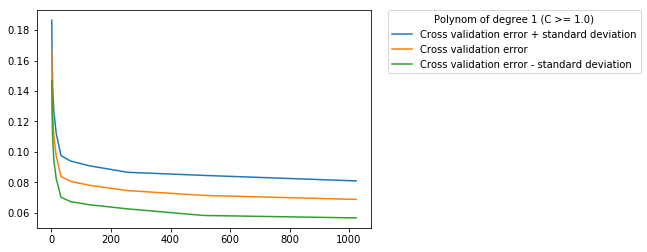

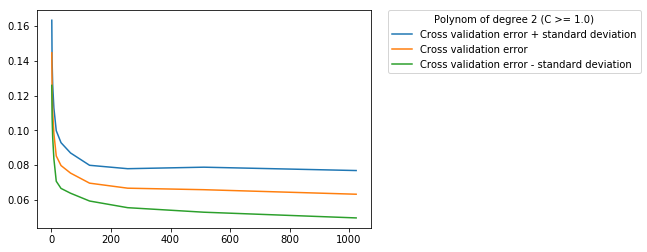

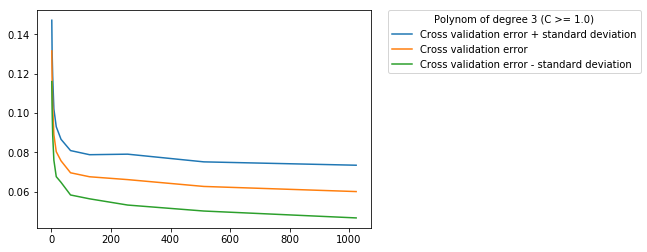

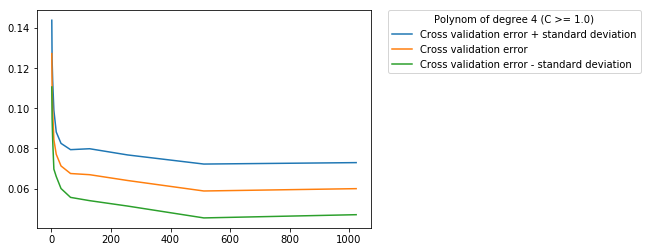

In [51]:
for d, info in validation_results.items():
    x = []
    cv_plus = []
    cv = []
    cv_minus = []
    for sample in info:
        C, cv_err, standard_dev = sample[1:]
        if (C < 1.0):
            continue
        x.append(C)
        cv_plus.append(cv_err + standard_dev)
        cv.append(cv_err)
        cv_minus.append(cv_err - standard_dev)
    plt.plot(x, cv_plus, label="Cross validation error + standard deviation")
    plt.plot(x, cv, label="Cross validation error")
    plt.plot(x, cv_minus, label="Cross validation error - standard deviation")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Polynom of degree " + str(d) + " (C >= 1.0)")
    plt.show()

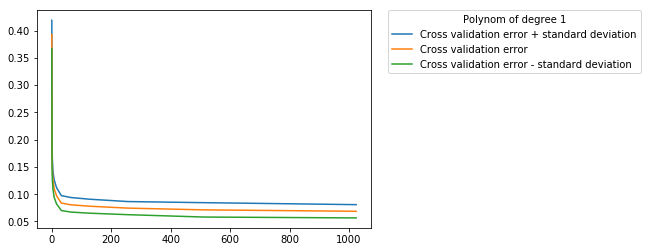

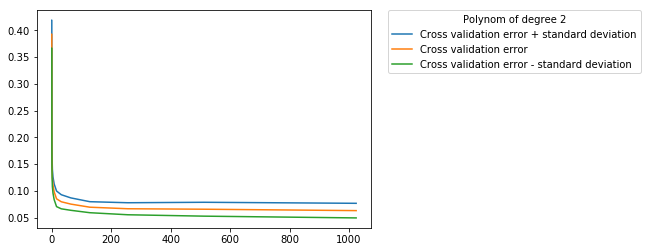

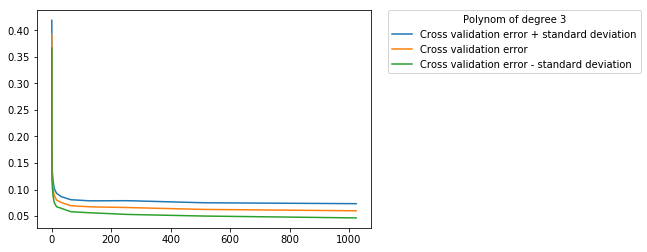

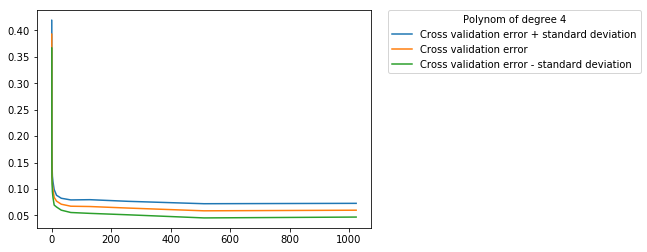

In [52]:
for d, info in validation_results.items():
    x = []
    cv_plus = []
    cv = []
    cv_minus = []
    for sample in info:
        C, cv_err, standard_dev = sample[1:]
        x.append(C)
        cv_plus.append(cv_err + standard_dev)
        cv.append(cv_err)
        cv_minus.append(cv_err - standard_dev)
    plt.plot(x, cv_plus, label="Cross validation error + standard deviation")
    plt.plot(x, cv, label="Cross validation error")
    plt.plot(x, cv_minus, label="Cross validation error - standard deviation")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Polynom of degree " + str(d))
    plt.show()

### Задание 4

Наилучший результат был получен на параметрах $C = 512, d = 4$ (Ошибка составляла $<6.0 \%$). Для получения результатов изменения количества опорных векторов от $d$ и для сравнения ошибки на кросс-валидации и на тестовой выборке был запущен следующий скрипт:

*** python2 run_test_and_validation_compare.py train.scale test.scale 9 30 ***

где 9 - порядок 2 для $C$ (т.е. $C = 2^9$), а 30 - максимальная степень d.

Результаты выполнения представлены ниже.

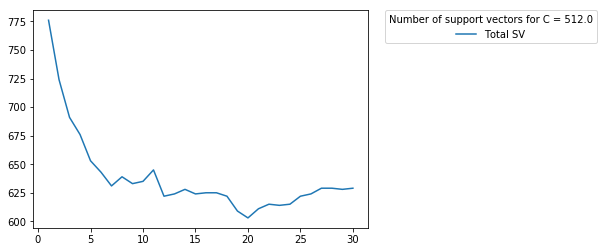

In [57]:
def extract_knowledge_from_block(block):
    params = re.findall(r'(?<=\().*?(?=\))', block)[0]
    params = params.split(", ")
    d, C = [p.split("=")[1] for p in params]
    d = int(d)
    C = float(C)
    numbers = [int(x) for x in block.split(": ")[1].split(" ")]
    return (d, C, numbers[0], numbers[1], numbers[2])

with open("sv_info") as sv_file:
    sv_info = sv_file.readlines()
    sv_info = [extract_knowledge_from_block(line) for line in sv_info] 

d = []
sv_total = []
C = 0.0
for sample in sv_info:
    d.append(sample[0])
    C = sample[1]
    sv_total.append(sample[2])

plt.plot(d, sv_total, label="Total SV")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Number of support vectors for C = " + str(C))
plt.show()

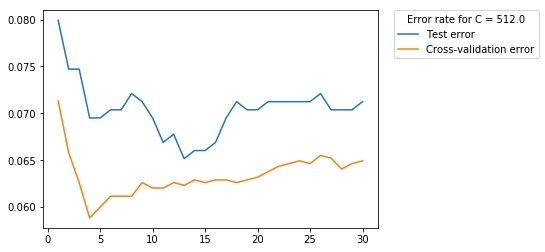

In [48]:
def extract_knowledge_from_block(block):
    params = re.findall(r'(?<=\().*?(?=\))', block)[0]
    params = params.split(", ")
    d, C = [p.split("=")[1] for p in params]
    d = int(d)
    C = float(C)
    error = 1.0 - float(block.split(": ")[1])
    return (d, C, error)

with open("test_results_on_diff_d") as test_data_results_file:
    lines = test_data_results_file.readlines()
    test_results = [extract_knowledge_from_block(line) for line in lines] 

with open("valid_report") as valid_report_file:
    lines = valid_report_file.readlines()
    valid_results = [extract_knowledge_from_block(line) for line in lines] 


d = []
test_error = []
valid_error = []
C = 0.0

for i in range(len(test_results)):
    d.append(test_results[i][0])
    C = test_results[i][1]
    test_error.append(test_results[i][2])
    valid_error.append(valid_results[i][2])

plt.plot(d, test_error, label="Test error")
plt.plot(d, valid_error, label="Cross-validation error")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Error rate for C = " + str(C))
plt.show()

Для пары $C = 512, d = 4$ количество опорных векторов равно 676. В среднем их количество равно 625-650. C учетом того, что тренировочная выборка состояла из 3450 сэмплов, а кол-во опорных векторов в среднем составило 625-650, то можно сказать, что 20% выборки используется в качестве опорных векторов.
Также это значит, что признаки подобраны довольно хорошо, чтобы SVM хорошо обучился и хорошо работал.